In [24]:
import sagemaker as sm
import json
import pandas as pd
import numpy as np

In [18]:
endpoint_name = 'Neural-Net-Fraud-Detection-2020-03-23-09-37-43-152'

In [19]:
my_predictor = sm.RealTimePredictor(endpoint_name)

In [20]:
from sagemaker.predictor import csv_serializer 

my_predictor.content_type = 'text/csv'
my_predictor.serializer = csv_serializer
my_predictor.deserializer = None

In [16]:
test_data = pd.read_csv('test.csv', header=None)
test_data.shape

In [17]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.102015,1.269862,-3.765699,0.099356,1.468189,-1.010584,2.415928,-0.238841,-0.780201,-1.495847,...,0.542770,0.523161,1.435602,0.375815,-0.090128,-0.763226,-0.401326,0.426126,0.410950,0
1,-5.761488,3.986062,-3.230338,-3.023193,0.165141,2.710268,-1.597503,2.996411,2.050103,3.057230,...,1.493858,-0.476712,-0.861829,0.274514,0.979828,0.700718,0.782482,0.947033,0.817032,0
2,-1.775500,-0.532486,2.164405,0.344457,-2.185833,1.371165,0.905827,-0.869216,-1.390445,0.037197,...,-0.703832,0.240027,-1.351394,-1.523694,0.503419,-0.416059,0.693571,0.420152,-0.019999,0
3,2.067075,-0.419097,-1.615867,0.749085,-0.148326,-1.100220,0.244915,-0.415253,-0.776355,1.064816,...,-0.664855,-0.295437,-0.261864,0.053549,-0.063444,0.316313,-0.490065,0.000871,-0.051857,0
4,-0.335724,1.238587,-0.197225,-1.286162,2.179192,0.150390,2.049676,-1.255266,1.308630,1.918635,...,1.026223,-0.742006,-0.691393,-0.196129,-0.298838,-0.286490,-0.019444,-0.477739,-0.996504,0


In [21]:
y_true = test_data.iloc[:,28:29]

In [32]:
y_true.head()

,28
0,0
1,0
2,0
3,0
4,0


In [25]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = []
    for array in split_array:
        x = my_predictor.predict(array).decode('utf-8')
        x = json.loads(x)
        x = np.array(x["predictions"])
        y = len(x)
        predictions = np.append(predictions,x)
    return predictions

result_out = predict(test_data.values[:,0:28])

In [41]:
y_pred = (result_out>0.12)

In [42]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

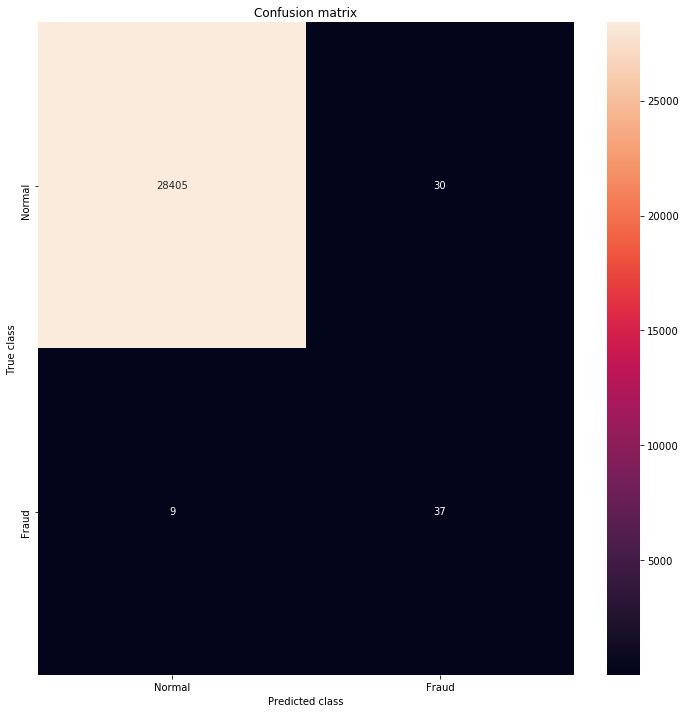

In [43]:
LABELS = ["Normal","Fraud"]
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
tn, fp, fn, tp = conf_matrix.ravel() 
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.55      0.80      0.65        46

    accuracy                           1.00     28481
   macro avg       0.78      0.90      0.83     28481
weighted avg       1.00      1.00      1.00     28481

